**#####################################################################**<br></br>
EHS Integration and Engineering Solutions<br></br>
<br></br>
COVID-19 data analysis - https://github.com/ehsintegration/COVID-19<br></br>
<br></br>
To evaluate an In[] cell, Click on the cell, and press shift-enter.<br></br>
**#####################################################################**<br></br>

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates
import datetime
import math
from scipy import optimize

In [3]:
1+1 

2

#####################################################################<br></br>
The following is how you import an object:<br></br>
    <br></br>
This object lets you access files from the GITHUB repository of files<br></br>
its where all of the COVID-19 data is kept.<br></br>
<br></br>
What is GITHUB : https://en.wikipedia.org/wiki/GitHub<br></br>
<br></br>
Documentation  : https://pygithub.readthedocs.io/en/latest/<br></br>
#####################################################################<br></br>

In [4]:
from github import Github

#####################################################################<br></br>
When you import the github library, an object called g needs to be<br></br>
created. This object will represent the github object that we will use<br></br>
to pull data from the github repository. You will be able to pull data<br></br> 
from your own personal repository, or any repository that exits in<br></br>
github.<br></br>
<br></br>
This object will be used to access any file or directory within the <br></br>
github "filesystem".<br></br>
<br></br>
For this access to occur you need to insert your personal github<br></br>
username and password. If you dont have one, you would need to creat a<br></br>
github account. Please note that the fields below are exactly what<br></br>
you would enter when prompted when logging into the github site.<br></br>
#####################################################################<br></br>

In [6]:
#g = Github("username", "password")

#####################################################################<br></br>
In the following command we create another object called<br></br>
repo (short for repository of files), and assign it to a specific <br></br>
repository. Specifically the John Hopikns repository located at: <br></br>
https://github.com/CSSEGISandData/COVID-19<br></br>
#####################################################################<br></br>

In [265]:
repo = g.get_repo("CSSEGISandData/COVID-19")

#####################################################################<br></br>
Here, we are getting the list of all the contents in the repository<br></br>
for COVID-19, and then listing all of the directories and files:<br></br>
    <br></br>
The following will list all of the contents of <br></br>
the https://github.com/CSSEGISandData/COVID-19 repository of files.<br></br>
#####################################################################<br></br>

In [266]:
contents = repo.get_contents("")

#####################################################################<br></br>
The oblect contents is now created, and it is a list of files and<br></br>
directories. These are stored in what is called a list.<br></br>
#####################################################################<br></br>

In [267]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


#####################################################################<br></br>
Next, we have the python syntax to iterate through all of the members<br></br>
of the list, one at a time, index is the variable used to iterate.<br></br>
#####################################################################<br></br>

In [268]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


#####################################################################<br></br>
Get the list of files from the directory that we are interested in.<br></br>
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports<br></br>
The files in this directory contains all of the data in CSV comma seperated<br></br>
file. There is a file for each day, and each line represents the amounts<br></br>
measured and reported for that day. Click on the link above, and explore<br></br>
the contents of each file. You will see the reporting structure for each <br></br>
line. The object contents below, will contain a list of all of the files.<br></br>
We will once again iterate with the index variable, and use it to iterate <br></br>
over all of the files in the directory.<br></br>
#####################################################################<br></br>

In [269]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [270]:
count = 1
for index in contents:
    url = index.download_url
    print(url)
    count = count + 1
print(count)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-

#####################################################################<br></br>
Here we are pulling in another object called BS4, which stands for<br></br>
Beautiful Soup 4. We will use the Beautiful Soup Object to fetch web data. <br></br>
Beautiful soup is normally used to parse HTML, but we are just using <br></br>
it to download the file and convert it to a string. We will be using the<br></br>
list of urls for each file above to download all of the files into one<br></br>
long array of lines. This long array will have all of the line entries<br></br>
for all of the files concatenated together. <br></br>
Note, that we have a check below to ensure, that we only use files that <br></br>
have the .csv extension.<br></br>
<br></br>
The next section will create an array of files in an object called files.<br></br>
#####################################################################<br></br>

In [271]:
import bs4 as bs
import urllib.request

In [272]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

print("Done.")

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

#####################################################################<br></br>
Print a file from the file list. files[0] is the first file, and file[1]<br></br>
is the second file. It should correlate to the second link listed above.<br></br>
#####################################################################<br></br>

In [273]:
print(len(files))

79


#####################################################################<br></br>
This routine below, create three dictionaries, that will be used later.<br></br>
The first is conf_dict: <br></br>
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of confirmed reports per location.<br></br>
The second is death_dict: <br></br>
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of death reports per location.<br></br>
The third dictionary is country_dictionary:<br></br>
  This disctionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  is initialized to zero. This is just used to maintain a list of reporting<br></br>
  locations. <br></br>
<br></br>
Since, the cumlative totals are per city. We will create three <br></br>
dictionaries, that will have the city as an index, and contain the total<br></br>
confirmed and death for that city. We will later iterate through all <br></br>
of the cities in a day, in order to calculate the true running total.<br></br>
#####################################################################<br></br>

In [274]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [275]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


#####################################################################<br></br>
The section traverses all of the dictionaries and calculates three <br></br>
additional dictionaries. The three dictionaries use the country as the<br></br>
index. Therefore, all of the city subtotals are added, to obtain a list <br></br>
of a single country total, for each day.<br></br>
<br></br>
The three dictionary of lists are for confirmed, death and percent.<br></br>
<br></br>
Please review the data produced. Notice that some of the locations stopped<br></br>
reporting, and have subsequent zeros. This is because the reportng structure <br></br>
has changed over time. For Hong Kong went from an independant report, and<br></br>
moved to a subtotal of China as a whole.<br></br>
#####################################################################<br></br>

In [276]:
state_conf_dict    = {}
state_death_dict   = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
        

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
#for CNT in country_dict:
#    print(CNT)
#    print(country_conf_dict[CNT])
#    print(country_death_dict[CNT])
#    print(country_rec_dict[CNT])
#    print(country_perc_dict[CNT])   

79


In [277]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 5.0000e+00 5.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 6.0000e+00
 6.0000e+00 7.0000e+00 7.0000e+00 7.0000e+00 7.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01
 1.7000e+01 1.7000e+01 1.0600e+02 1.0800e+02 1.4700e+02 1.7100e+02
 1.7100e+02 1.7100e+02 3.4800e+02 3.6100e+02 6.8100e+02 8.6900e+02
 1.0720e+03 2.6650e+03 5.6440e+03 7.0240e+03 8.4740e+03 9.0010e+03
 9.7070e+03 1.4652e+04 1.7448e+04 1.9581e+04 2.1763e+04 2.3559e+04
 2.5410e+04]


#####################################################################<br></br>
<br></br>
Create list of dates starting on 1-22-2020<br></br>
<br></br>
#####################################################################<br></br>

In [278]:
# Print the total number of reporting days we have
print(days)

79


In [279]:
dates = [datetime.date(2020,1,22) + datetime.timedelta(days=i) for i in range(days)]
print(dates)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

#####################################################################<br></br>
In this plot we create a dictionary of population for each location<br></br>
<br></br>
This data was sourced form wolframalpha , https://www.wolframalpha.com/<br></br>
<br></br>
We use this data to plot a population adjusted confirmed case for the<br></br>
diferentr countries. <br></br>
<br></br>
We also sort all of the data, and use it to find the top confirmed cities,<br></br>
and then we create a population dictionary for that list<br></br>
<br></br>
#####################################################################<br></br>

In [280]:
def lastelem(elem):
    #print(elem)
    #print(len(elem))
    lelem = len(elem[1])
    #print(len(elem[1]))
    #print(elem[1][lelem-1])
    return (elem[1][lelem-1])

test = country_conf_dict
test_sort = sorted(test.items(), key=lastelem, reverse=True)

for location in test_sort:
    lelem = len(location[1])
    if (location[1][lelem-1] > 10000):
        #print(location)
        #print(len(location))
        print(location[0],end=",")
print("")

US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Belgium,Switzerland,Netherlands,Canada,Brazil,Portugal,Austria,South Korea,Russia,


In [281]:
# Population in the milllions

population_dict = {} 
population_dict['US']             = 324
population_dict['Italy']          = 59.4

#population_dict['China-Hubei']   = 58.16
#population_dict['China']          = 1400
population_dict['China']          = 58.16

population_dict['Spain']          = 46.4 
population_dict['Germany']        = 82.1
population_dict['France']         = 65  
population_dict['Iran']           = 81.2
population_dict['United Kingdom'] = 66.2
population_dict['Switzerland']    = 8.48
population_dict['Netherlands']    = 17
population_dict['Belgium']        = 11.4
population_dict['South Korea']    = 51.47
population_dict['India']          = 1339

# Given the ability that China has to close borders, Hubei becomes like a country
# so the population divisor should really be the population of Hubei, but we left
# it has China

#####################################################################<br></br>
<br></br>
Linear plot<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


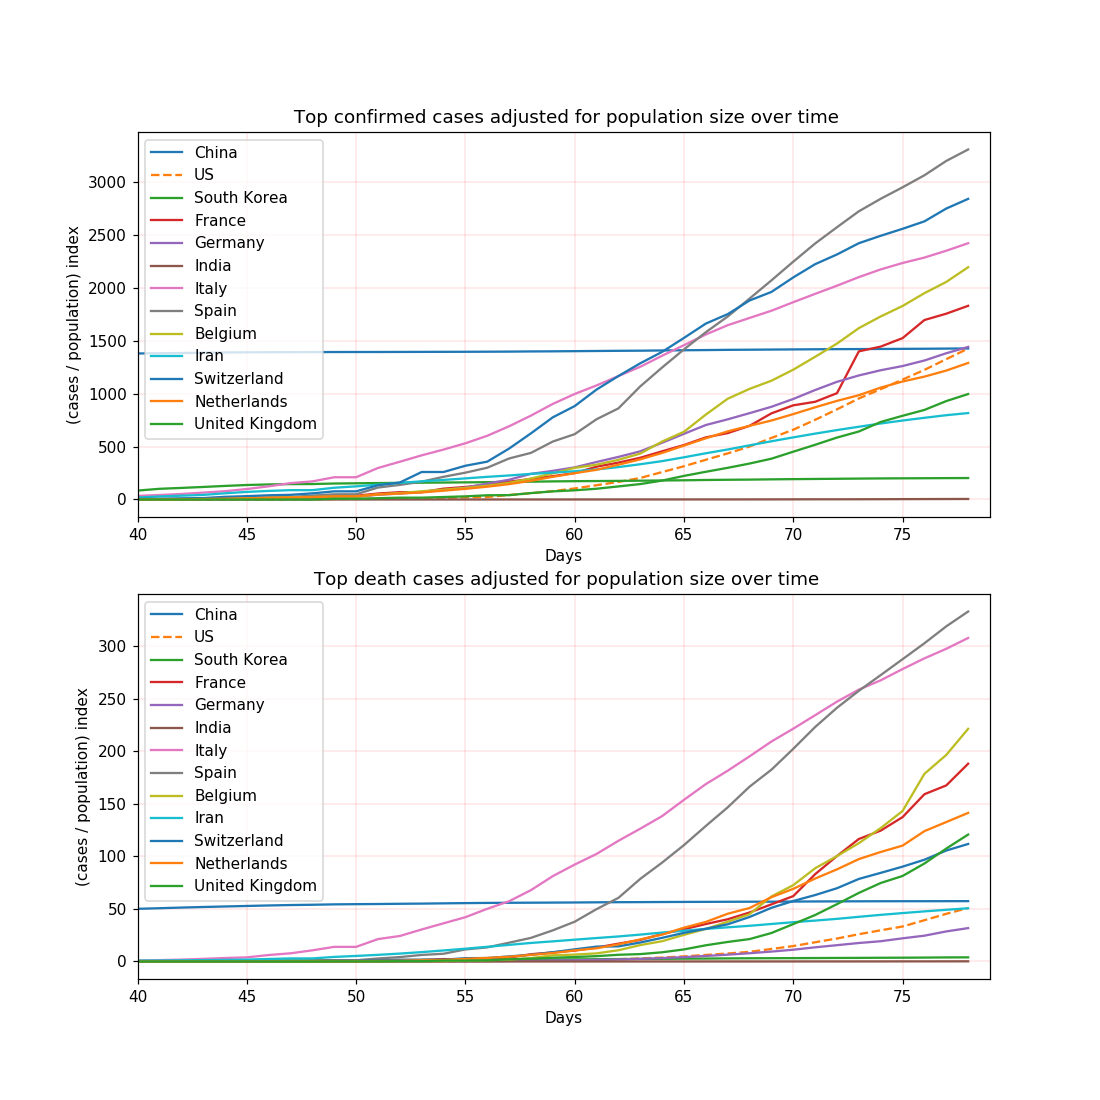

In [282]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(40, days)
#ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('linear')


ax[1].set_xlim(40, days)
#ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('linear')

                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            #x = dates
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  


#####################################################################<br></br>
<br></br>
Log plot<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


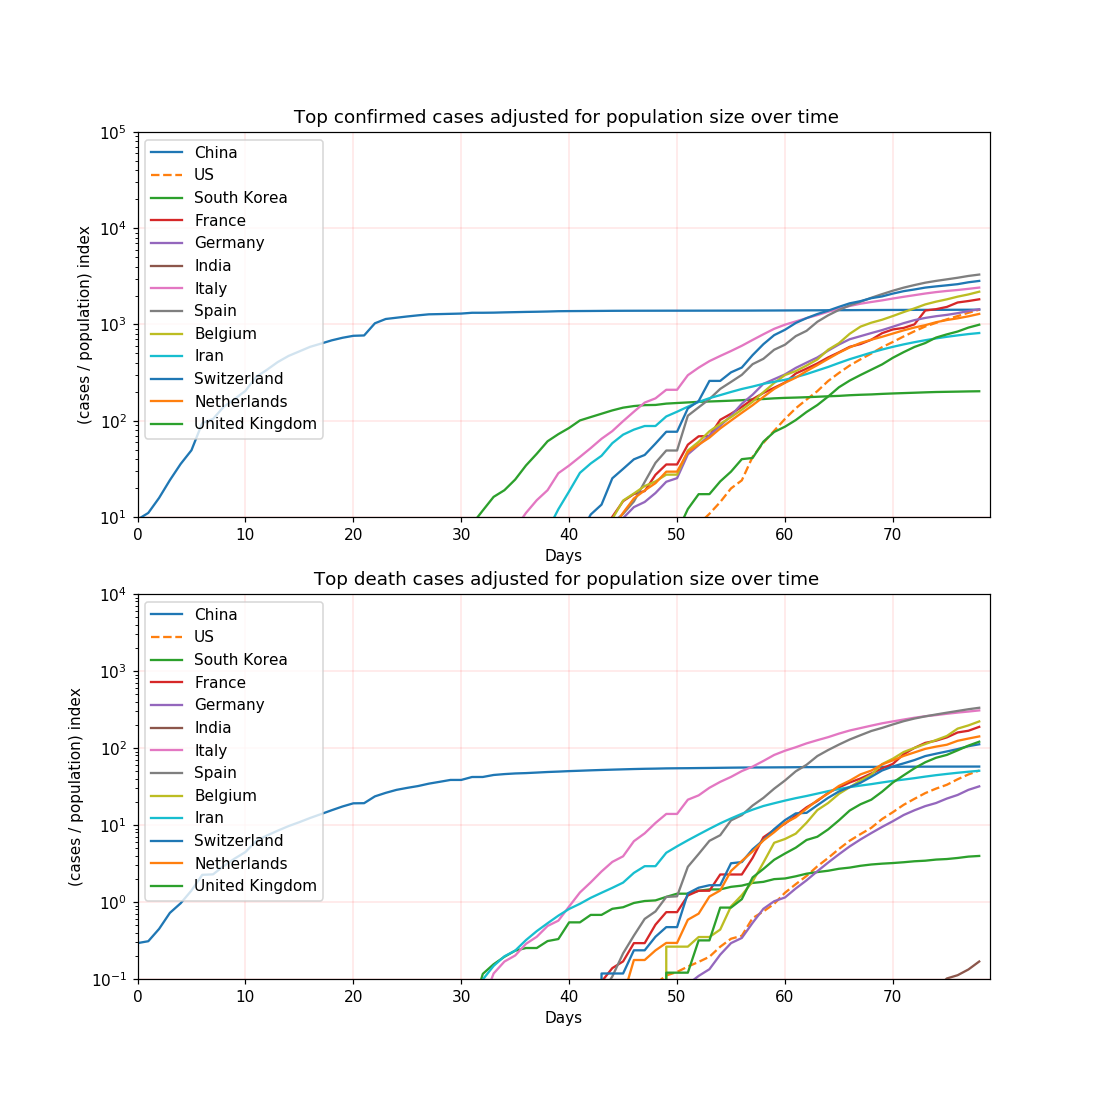

In [283]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(0, days)
ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('log', basey=10)


ax[1].set_xlim(0, days)
ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('log', basey=10)
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
                
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  
    

#####################################################################<br></br>
<br></br>
PLot of the slope for the confirmed cases. This plot is also adjusted<br></br>
for population size.<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


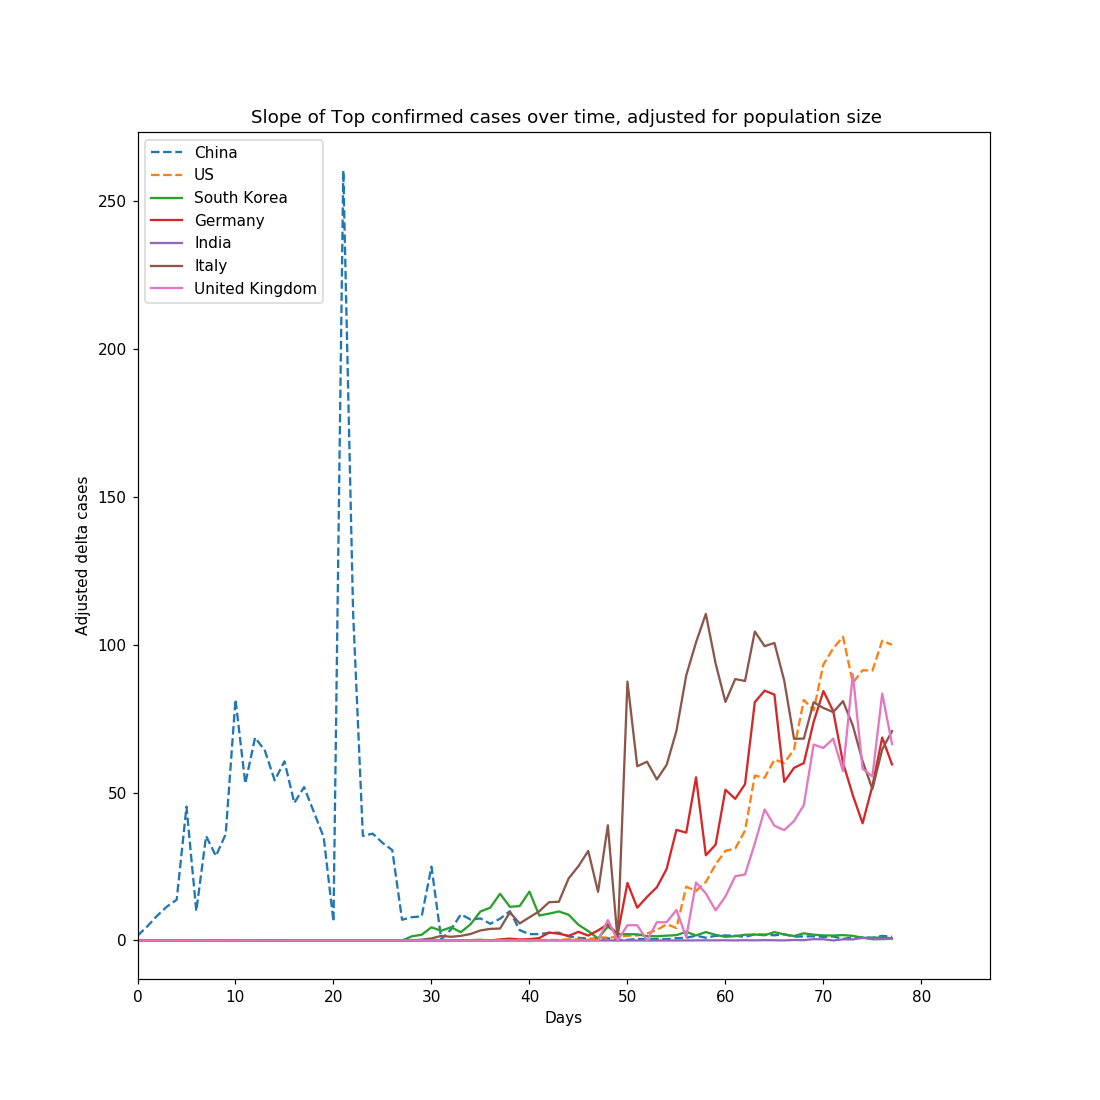

In [284]:
# Plot the deriavtive of the confirmed

fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Slope of Top confirmed cases over time, adjusted for population size")
ax.set_ylabel("Adjusted delta cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 'Iran (Islamic Republic of)']  
include_list = ['China', 'US', 'Italy', 'Germany', 'South Korea', 'United Kingdom', 'India']
                        
# Daily total for all of the cities summed together
for CNT in Dcountry_conf_dict:
    #print(CNT)
    if (str(include_list).find(CNT) > 0)  :
        x = range(0,len(Dcountry_conf_dict[CNT]))
        y = Dcountry_conf_dict[CNT]   /  population_dict[CNT]   
        if ("US" in CNT) or ("China" in CNT) or ("Itay" in CNT):
            ax.plot(x,y, label=CNT, linestyle='--')
        else:
            ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")  

#####################################################################<br></br>
<br></br>
# COVID-19 SIR model<br></br>
https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/<br></br>
https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html<br></br>
<br></br>
#####################################################################<br></br>
<table align="left">
  <thead>
    <tr>
      <th style="text-align: left">Country</th>
      <th style="text-align: left">beta</th>
      <th style="text-align: left">gamma</th>
      <th style="text-align: left">R0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left">Japan</td>
      <td style="text-align: left">0.00000927</td>
      <td style="text-align: left">0.01837935</td>
      <td style="text-align: left">0.00050458</td>
    </tr>
    <tr>
      <td style="text-align: left">South Korea</td>
      <td style="text-align: left">0.00001298</td>
      <td style="text-align: left">0.00000001</td>
      <td style="text-align: left">1297.76738269</td>
    </tr>
    <tr>
      <td style="text-align: left">Italy</td>
      <td style="text-align: left">0.00001713</td>
      <td style="text-align: left">0.01414756</td>
      <td style="text-align: left">0.00121065</td>
    </tr>
    <tr>
      <td style="text-align: left">Iran</td>
      <td style="text-align: left">0.00003974</td>
      <td style="text-align: left">0.08023309</td>
      <td style="text-align: left">0.00049526</td>
    </tr>
  </tbody>
</table>

<IPython.core.display.Javascript object>


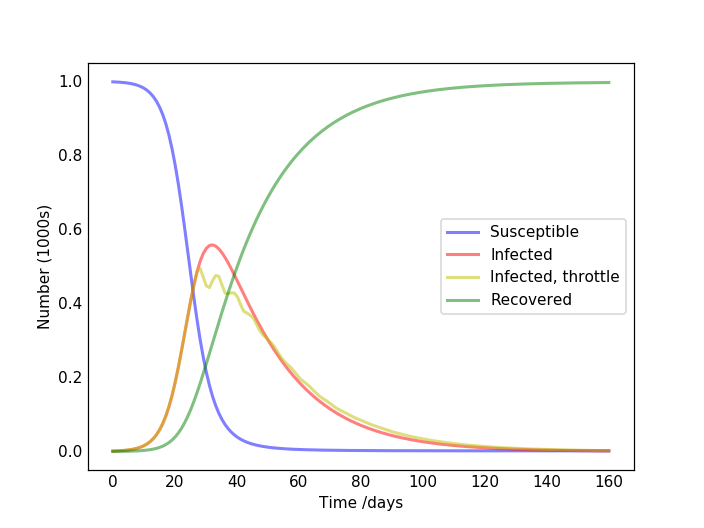

In [438]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0.00121065
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta0, gamma = 0.325,  1./20   #0.01414756  #1./10

num_days = 160

# A grid of time points (in days)
t = np.linspace(0, num_days, num_days)

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.ion()
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)

# Throttle pattern
th        = np.arange(28.0, 2*num_days, 3.0)
th_index  = 0
throttle  = True  

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    
    global th
    global th_index
    global throttle 
        
    if (throttle):         
        if (t > th[th_index]):
            th_index = th_index + 1          
        th_gate  = ( (th_index+1) % 2)  # Plus one, to start with 1.0           
        b = beta * th_gate
    else:
        b= beta
           
    #if (t>28.0):
    #    b = beta * 0.0001
    #if (t>31.0):
    #    b = beta * 1.0
    #if (t>33.0):
    #    b = beta * 0.0001
    #if (t>35.0):
    #    b = beta * 1.0
    #if (t>37.0):
    #    b = beta * 0.0001
    #if (t>39.0):
    #    b = beta 
        
    S, I, R = y
    dSdt = -b * S * I / N
    dIdt = b * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


throttle = False

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
      
throttle = True
   
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
St, It, Rt = ret.T

ax.clear()
ax.plot(t, S/1000,  'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000,  'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, It/1000, 'y', alpha=0.5, lw=2, label='Infected, throttle')
ax.plot(t, R/1000,  'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
    
fig.canvas.draw()
fig.canvas.flush_events()
plt.pause(0.5)

#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
#plt.show()

**#####################################################################**<br></br>
<br></br>
Timeline projection<br></br>
<br></br>
We should be using the epidemiological curve, but we are using a normal<br></br>
distribution, to represent the distibution of time. We are also pulling from <br></br>
our other analysis that shows the US delay to Italy is about 15 days.<br></br>
<br></br>
We are trying to normalize the curves, and for the US we are making the<br></br>
assumption that the max slope is 30,000.<br></br>
<br></br>
**#####################################################################**<br></br>

<IPython.core.display.Javascript object>


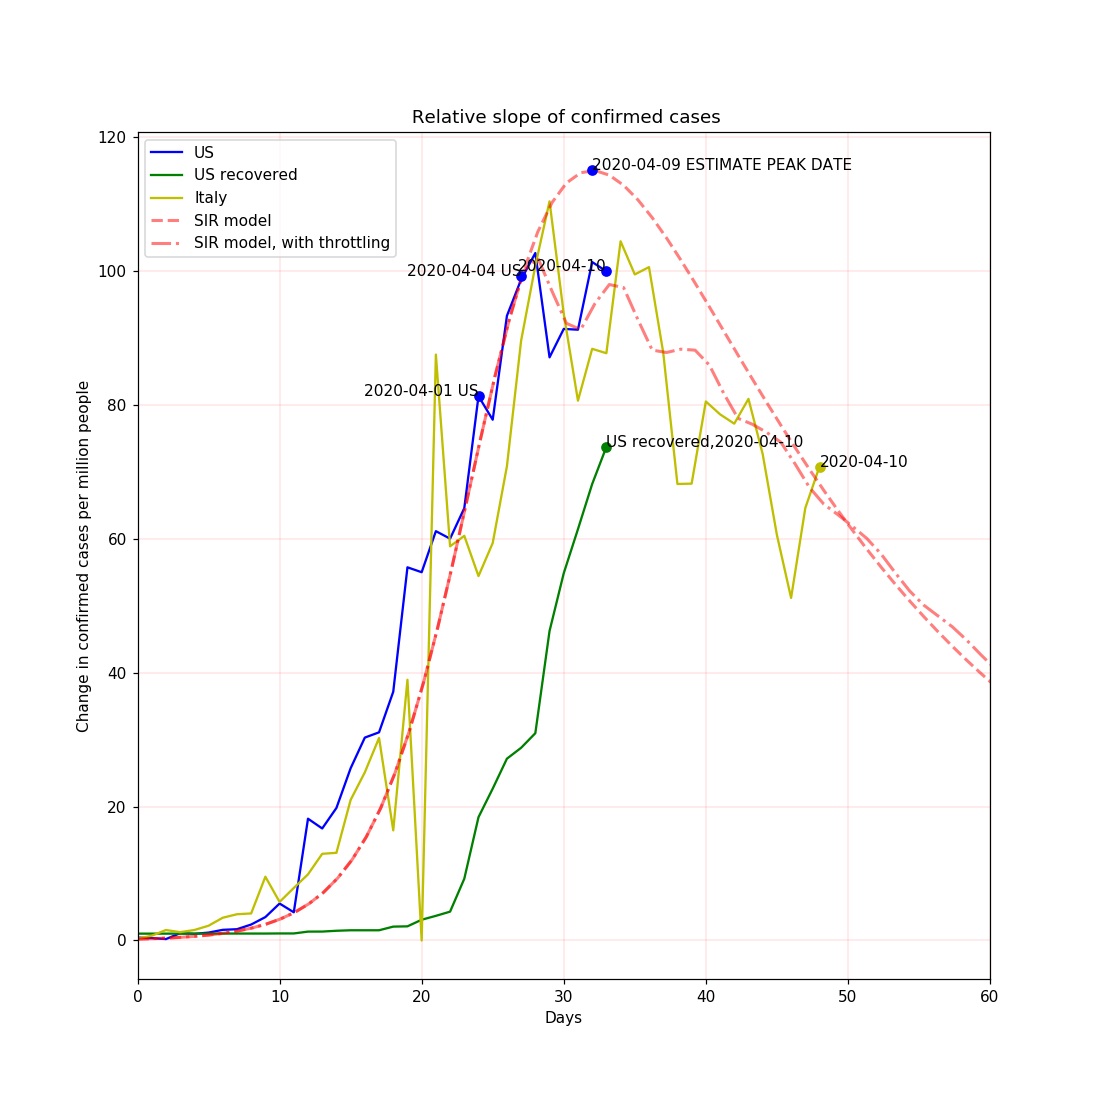

US 33 99.95370370370371 g-
Italy 48 70.77441077441078 g-


Text(0.5, 1.0, ' Relative slope of confirmed cases')

In [439]:
fig, ax = plt.subplots(figsize = (10,10))  

# Number of days to project
#
projected   = 60

# What day is it
#
datetime_object = datetime.datetime.now()

# Init graph
#
ax.set_xlim(0, projected)
#ax.set_ylim(5, 200000)
ax.set_ylabel("Change in confirmed cases per million people")
ax.set_xlabel("Days")
ax.set_yscale('linear')

# Max slope for each country, used to normalize
#
include_list = ["US", "Italy"]
offset_list  = {"US" : 0.4, "Italy" : 0.0769}

# List of dates to notate
#
# (first point) US 27 99.17592592592592, Italy 42 77.1885521885522
dates = {  "24" : [81.37345679012346, "2020-04-01 US"],
           "27" : [99.17592592592592, "2020-04-04 US"],             #"42" : [77.1885521885522,  "2020-04-04 Italy"],
           "32" : [115.0, "2020-04-09 ESTIMATE PEAK DATE"]}


# Equation for curve fit
#
def test_func(x, a, b):
    return ( 25 * (1/(2.5*a)) * np.exp(  -1 * (x-b)**2 / (2*(a**2)) )  )

# Plot death rate for US
#
for CNT in country_conf_dict:
    
        if (str(include_list).find(CNT) >=0 ):
            
            projected_country = CNT
            fit_cut           = offset_list[CNT]

            x = range(0,len(country_conf_dict[CNT]))
            
            y1 = Dcountry_conf_dict[CNT] / population_dict[CNT]
            y2 = country_rec_dict[CNT] / population_dict[CNT]
            
            # Find first non-zero data
            first_point = 0
            first_value = 0
            for i in range(0,len(y1)):
                if (y1[i] > fit_cut):
                    first_point = i
                    first_value = y1[i]
                    break
                              
            # Remove time delay offset for curve fit
            #
            fit_x = []
            fit_y = []
            fit_yr = []
            for i in range(first_point, len(y1)):
                fit_x.append(i - first_point);
                fit_y.append(y1[i])
                fit_yr.append(y2[i]+1)
                   
            if ("US" in CNT):
                lbl = str(datetime.datetime.now()).split(" ")[0]
                
                # Plot slope and recovered
                ax.plot(fit_x, fit_y, 'b-', label=projected_country)
                ax.plot(fit_x,fit_yr, 'g-', label='US recovered')
                
                # A label for US recovered
                ax.plot(fit_x[-1],fit_yr[-1], 'go')
                ax.text(fit_x[-1],fit_yr[-1], 'US recovered,' + lbl,horizontalalignment='left')
                
                lbl = str(datetime.datetime.now()).split(" ")[0]
                ax.plot(fit_x[-1],fit_y[-1], 'bo') 
                ax.text(fit_x[-1],fit_y[-1], lbl,horizontalalignment='right')
            
            else:
                # Plot slope
                ax.plot(fit_x,fit_y, 'y-', label=projected_country)
                #ax.plot(fit_x,fit_yr, 'y-', label='Italy recovered', linestyle="--")
                
                lbl = str(datetime.datetime.now()).split(" ")[0]
                ax.plot(fit_x[-1],fit_y[-1], 'yo') 
                ax.text(fit_x[-1],fit_y[-1], lbl,horizontalalignment='left')
        
            ax.grid(color='r', linestyle='-', linewidth=0.1)          
            ax.legend(loc="upper left")   

            # print current time label, to be added to dates dictionary above
            #
            print(CNT,fit_x[-1], fit_y[-1], 'g-')
            
                    
# Plot projected line
#
ax.plot(t, (123.6/0.6)*(I/1000),  'r', alpha=0.5, lw=2, label='SIR model', linestyle='--')
ax.plot(t, (123.6/0.6)*(It/1000), 'r', alpha=0.5, lw=2, label='SIR model, with throttling', linestyle='-.')

#ax.plot(x2,y2, label='projection', linestyle='--')

ax.grid(color='r', linestyle='-', linewidth=0.1)          
ax.legend(loc="upper left")  

# Label previous dates:
# 
for i in dates:
    loc   = int(i)
    value = dates[i][0]
    lbl   = dates[i][1]
    if (loc < 30):
        ax.plot(loc,value, 'bo') 
        ax.text(loc,value,lbl,horizontalalignment='right')
    else:
        ax.plot(loc,value, 'bo') 
        ax.text(loc,value,lbl,horizontalalignment='left')        

# Update Title to indicate date, and prediction
#
ax.set_title(" Relative slope of confirmed cases")


In [264]:
print(str(datetime.datetime.now()).split(" ")[0])

2020-04-09
